## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
print(df.head())
print(df.tail())

**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby("TAG").sum()

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
df.groupby("TAG").count()

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
print(df.DATE[1])
type(df.DATE[1])

In [ ]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

## Data Manipulation



In [ ]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
print(test_df)
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df = df.pivot(index ='DATE', columns = "TAG", values="POSTS")

In [ ]:
reshaped_df.shape

In [ ]:
reshaped_df.columns

In [ ]:
reshaped_df.head()

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
reshaped_df.count()

In [ ]:
reshaped_df.fillna(0, inplace=True)


In [ ]:
reshaped_df.head()

In [49]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

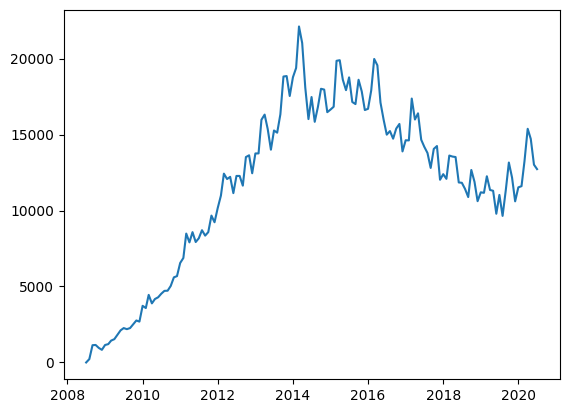

In [52]:
plt.plot(reshaped_df.index, reshaped_df.java)

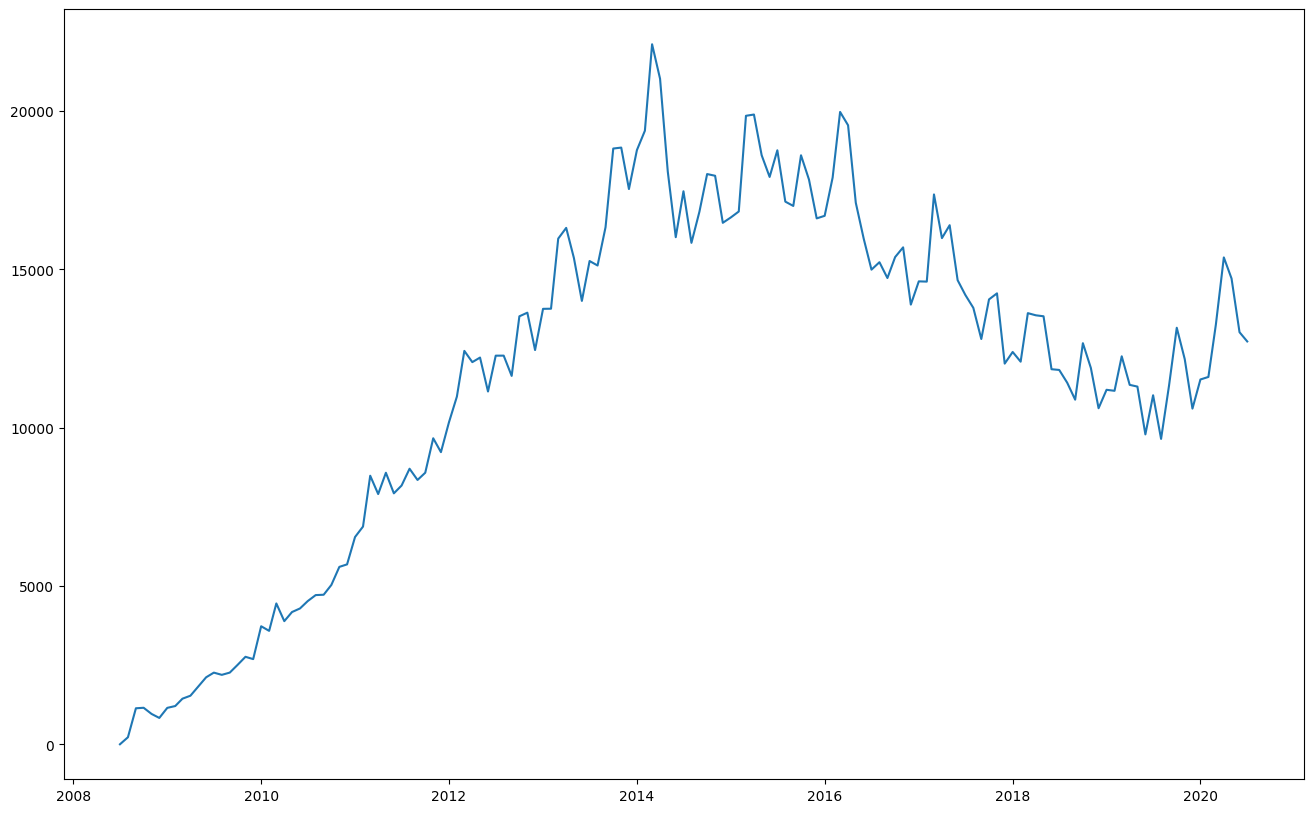

In [53]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)

(0.0, 35000.0)

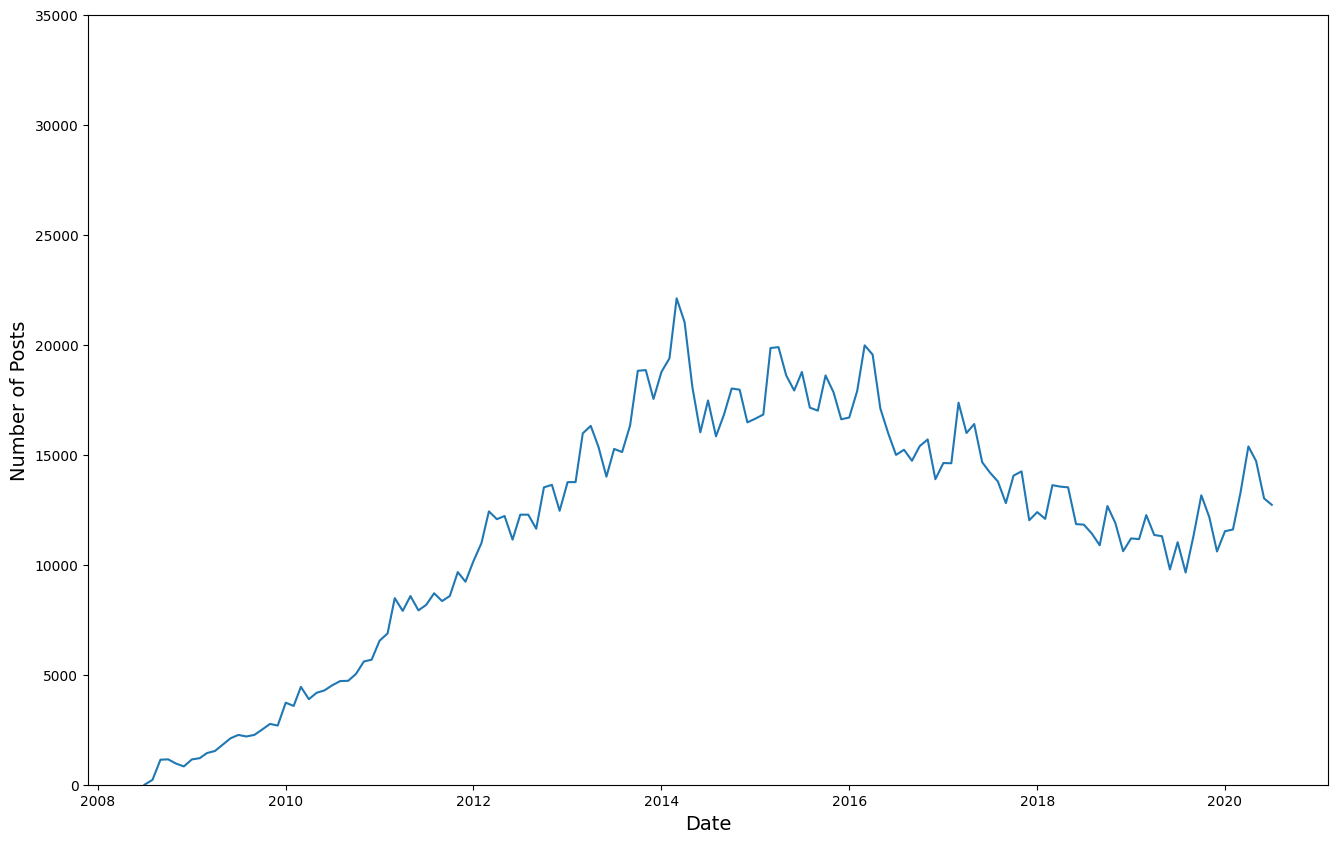

In [56]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

(0.0, 35000.0)

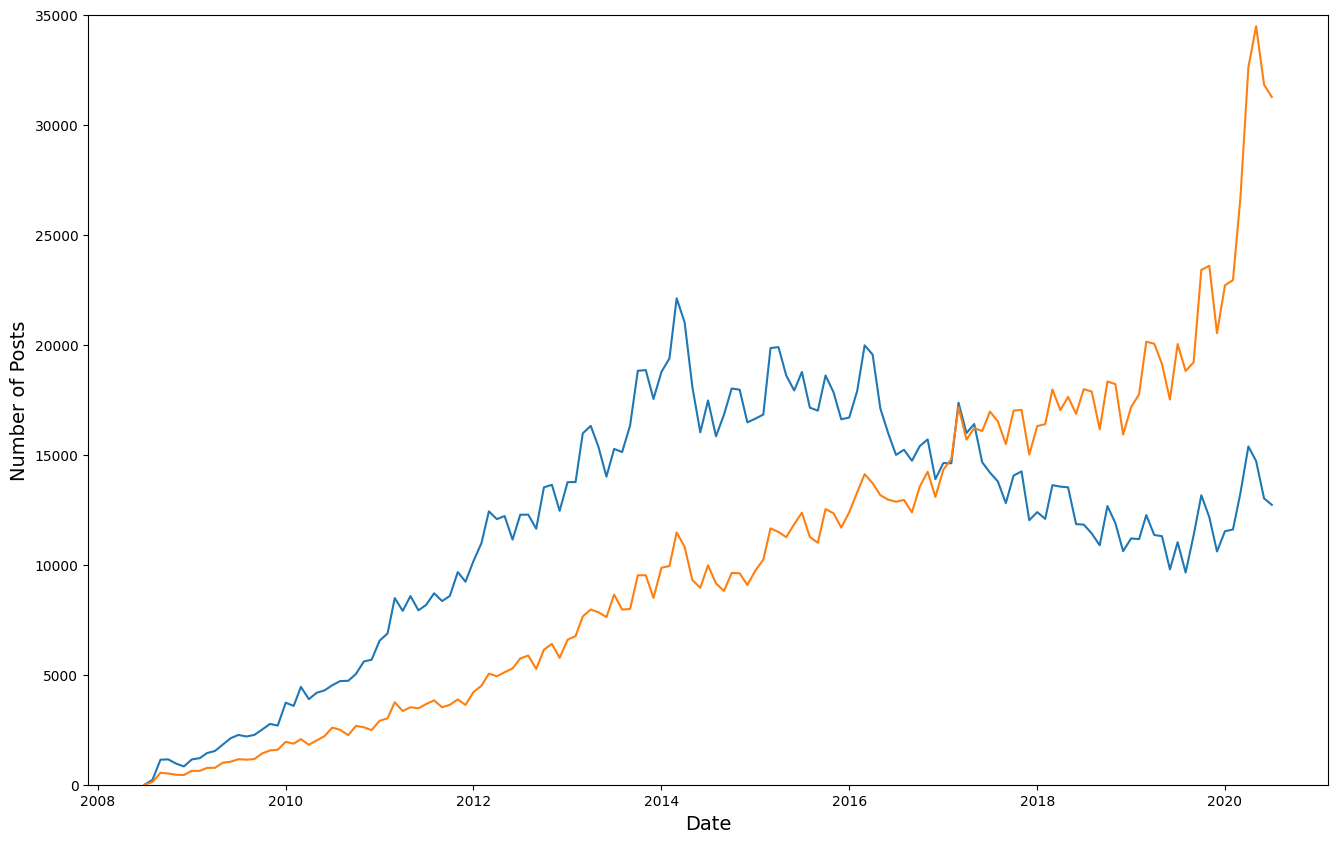

In [58]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

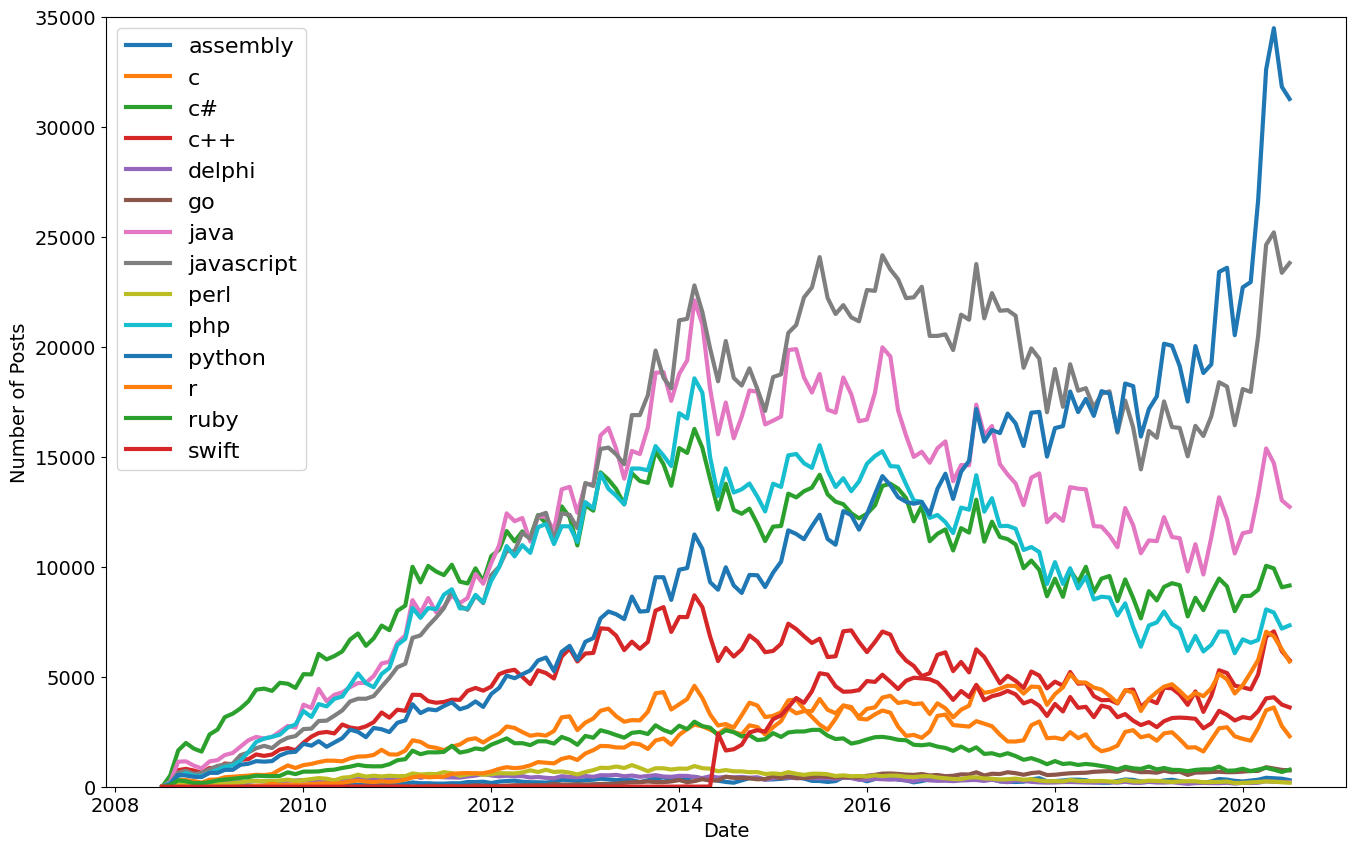

In [62]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [69]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()



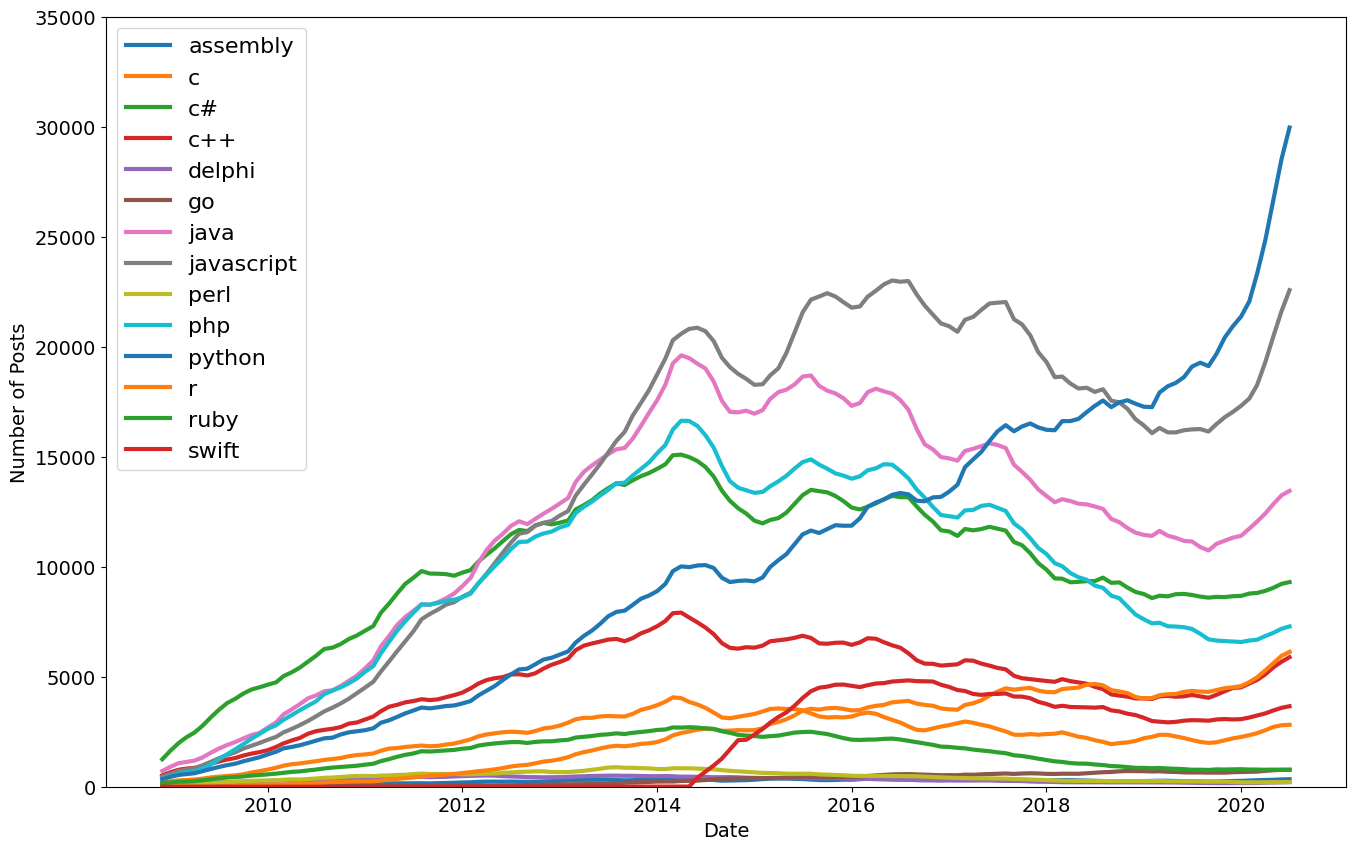

In [72]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)
    plt.legend(fontsize=16)

# 📊 Data Science Project: Programming Language Trends

Congratulations on completing another challenging data science project! This analysis dives into raw post data to uncover trends in programming language popularity over time using **Pandas** and **Matplotlib**.

## 🧪 What We Did

Throughout this project, we:

- Explored post frequency per programming language using `.groupby()`
- Converted string dates to `Datetime` objects with `to_datetime()` for better time-series handling
- Reshaped the dataset using `.pivot()` to turn categories into columns
- Identified missing values with `.count()` and `isna().values.any()`, then filled them using `.fillna()`
- Created multiple line charts using `.plot()` inside a `for` loop
- Customized chart aesthetics: figure size, axis labels, and bounds
- Added legends to distinguish lines by color
- Applied `.rolling().mean()` to smooth time-series data and highlight trends

## 📈 Outcome

The final visualizations reveal how interest in different programming languages has evolved, offering insights into long-term shifts and seasonal patterns. This project demonstrates how to transform raw data into compelling visual stories using Python.
